<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_image_tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00


In [2]:
# AIDI1006-image-tagging.ipynb v.2023
# Sample code 1 - using ComputerVisionClient

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

# Authenticate // Authenticates your credentials and creates a client.
# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "7159977d23c14abe9254b8429040885b"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
remote_image_url = "https://health.gov/sites/default/files/styles/max_650x650/public/2020-12/HP2030-LHI.jpg?itok=OrfQg4kM"

# Tag an Image - remote
# This example returns a tag (key word) for each thing in the image.
print("===== Tag an image - remote =====")
tags_result_remote = computervision_client.tag_image(remote_image_url) # Call API with remote image

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'clothing' with confidence 99.95%
'person' with confidence 99.90%
'human face' with confidence 99.74%
'outdoor' with confidence 99.47%
'smile' with confidence 90.81%
'people' with confidence 86.09%
'mammal' with confidence 84.10%
'woman' with confidence 74.32%
'standing' with confidence 72.33%
'street' with confidence 58.61%


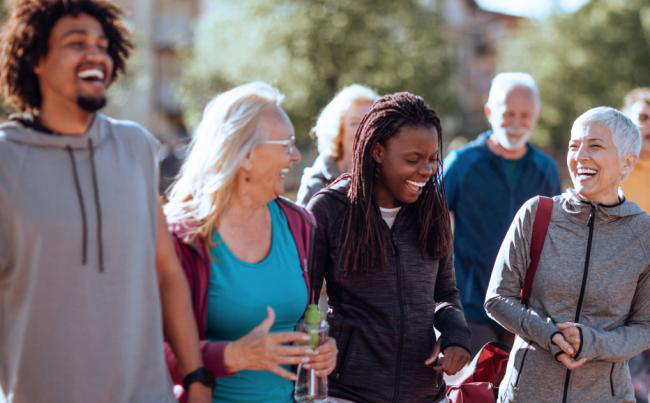

In [3]:
# Read the image URL and print the image file (URL) // Remote image
from PIL import Image
import requests
img = Image.open(requests.get(remote_image_url, stream=True).raw)
img